In [2]:
# Data cleaning for water surface temperature dataset
# Location: Scripps Pier, La Jolla Shores, San Diego, CA

In [61]:
# dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import csv

In [62]:
# Creating path for water surface temperature of La Jolla
SURF_PATH = os.path.join("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/water_surface_temp.csv")

def load_surftemp_data(surf_path=SURF_PATH):
    temp_path = os.path.join(surf_path)
    return pd.read_csv(temp_path)

surf_pd = load_surftemp_data()
surf_pd.head()

,YEAR,MONTH,DAY,TIME_PST,TIME_FLAG,SURF_TEMP_C,SURF_FLAG,BOT_TEMP_C,BOT_FLAG,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1916.0,8.0,22.0,NaN,NaN,19.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1916.0,8.0,23.0,NaN,NaN,19.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1916.0,8.0,24.0,NaN,NaN,19.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1916.0,8.0,25.0,NaN,NaN,19.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1916.0,8.0,26.0,NaN,NaN,19.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Removing columns not needed from Surface Temperature dataframe
surf_temp_pd = surf_pd.drop(['TIME_FLAG', 'SURF_FLAG', 'BOT_FLAG', 'Unnamed: 9',
                            'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
                             'Unnamed: 13'], axis=1)
surf_temp_pd.head()

,YEAR,MONTH,DAY,TIME_PST,SURF_TEMP_C,BOT_TEMP_C
0,1916.0,8.0,22.0,NaN,19.5,NaN
1,1916.0,8.0,23.0,NaN,19.9,NaN
2,1916.0,8.0,24.0,NaN,19.7,NaN
3,1916.0,8.0,25.0,NaN,19.7,NaN
4,1916.0,8.0,26.0,NaN,19.5,NaN


In [64]:
# Removing all rows of column 'SURF_TEMP_C' with values 'NaN'
surf_temp_drop = surf_temp_pd.dropna(subset = ['SURF_TEMP_C'])
surf_temp_clean = surf_temp_drop.rename(columns={'YEAR':'Year', 'MONTH':'Month', 
                                                 'DAY':'Day', 'TIME_PST':'Time (PST)',
                                                 'SURF_TEMP_C':'Surface Temperature',
                                                 'BOT_TEMP_C':'Sea Floor Temperature'})
surf_temp_clean.head()

,Year,Month,Day,Time (PST),Surface Temperature,Sea Floor Temperature
0,1916.0,8.0,22.0,NaN,19.5,NaN
1,1916.0,8.0,23.0,NaN,19.9,NaN
2,1916.0,8.0,24.0,NaN,19.7,NaN
3,1916.0,8.0,25.0,NaN,19.7,NaN
4,1916.0,8.0,26.0,NaN,19.5,NaN


In [65]:
# Mean of each year
surf_temp_mean = surf_temp_clean.groupby('Year').mean().reset_index()
surf_temp_mean.head()

,Year,Month,Day,Time (PST),Surface Temperature,Sea Floor Temperature
0,1916.0,10.281818,16.600000,NaN,15.641818,NaN
1,1917.0,6.549669,15.844371,NaN,16.742715,NaN
2,1918.0,6.524272,15.741100,NaN,17.385113,NaN
3,1919.0,6.611650,15.731392,NaN,16.810032,NaN
4,1920.0,6.498615,15.747922,NaN,16.576177,NaN


In [66]:
# 'DAY' and 'MONTH' column no longer necessary and therefore removing
surf_temp_df = surf_temp_mean.drop(['Month', 'Day'], axis=1)
surf_temp_df.head()

,Year,Time (PST),Surface Temperature,Sea Floor Temperature
0,1916.0,NaN,15.641818,NaN
1,1917.0,NaN,16.742715,NaN
2,1918.0,NaN,17.385113,NaN
3,1919.0,NaN,16.810032,NaN
4,1920.0,NaN,16.576177,NaN


In [67]:
surf_temp_df.describe()

,Year,Time (PST),Surface Temperature,Sea Floor Temperature
count,104.000000,30.000000,104.000000,94.000000
mean,1967.500000,1074.122179,17.233217,16.725374
std,30.166206,72.478644,0.802877,0.848021
min,1916.000000,931.217647,15.546027,14.709749
25%,1941.750000,1019.456594,16.629663,16.104036
50%,1967.500000,1084.321429,17.045890,16.636732
75%,1993.250000,1112.850999,17.683491,17.230892
max,2019.000000,1223.152824,19.585294,19.031449


In [68]:
# Minimum mean surface and sea floor temperature
surf_min = surf_temp_df["Surface Temperature"].min()
floor_min = surf_temp_df["Sea Floor Temperature"].min()
# Maximum mean surface temperature
surf_max = surf_temp_df["Surface Temperature"].max()
floor_max = surf_temp_df["Sea Floor Temperature"].max()
# Summary Dataframe for the mean Maximum and Minimum Temperatures of Scripps Pier
temp_summary = pd.DataFrame({
    'Temperature': ["Surface", "Sea Floor"],
    'Minimum': [surf_min, floor_min],
    'Maximum': [surf_max, floor_max]
})
temp_summary

,Temperature,Minimum,Maximum
0,Surface,15.546027,19.585294
1,Sea Floor,14.709749,19.031449


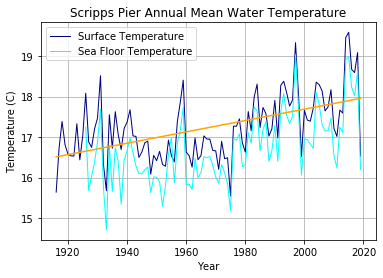

In [69]:
# Line graph of the mean Surface and Bottom Temperature over time
x_axis = surf_temp_df['Year']
surface_y = surf_temp_df['Surface Temperature']
bottom_y = surf_temp_df['Sea Floor Temperature']
surf_temp, = plt.plot(x_axis, surface_y, linewidth=1, color='Navy', 
                      label="Surface Temperature")
bottom_temp, = plt.plot(x_axis, bottom_y, linewidth=1, color='cyan', 
                        label="Sea Floor Temperature")
# adds a legend and sets location on upper righthand corner
plt.legend(loc = "upper left")
plt.title("Scripps Pier Annual Mean Water Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
# adding trendline 
z = np.polyfit(x_axis, surface_y, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"orange")
plt.grid()
# saves an image of the above chart to view in Class Data folder
plt.savefig("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/scripps_water_temp.png")
plt.show()

In [70]:
# Importing CO2 data

SEALEVEL_PATH = os.path.join("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/sealevel_clean.csv")

def load_sealevel_data(sealevel_path=SEALEVEL_PATH):
    sealev_path = os.path.join(sealevel_path)
    return pd.read_csv(sealev_path)

sealevel_pd = load_sealevel_data()
sealevel_pd.head()

,Unnamed: 0,Year,MSL
0,0,1924,-0.225
1,1,1924,-0.195
2,2,1925,-0.198
3,3,1925,-0.207
4,4,1925,-0.150


In [150]:
sea_level_yr = sealevel_pd.groupby('Year').mean().reset_index()
sea_1969 = sea_level_yr[sea_level_yr["Year"] >= 1969].reset_index()
sea_1969.head()

,index,Year,Unnamed: 0,MSL
0,44,1969,515.5,-0.038000
1,45,1970,527.5,-0.069583
2,46,1971,539.5,-0.096833
3,47,1972,551.5,-0.024833
4,48,1973,563.5,-0.097000


temp_1969 = [df["location"] ==1]

In [151]:
# Checking final year of carbon_group dataframe
sea_1969.tail()

,index,Year,Unnamed: 0,MSL
46,90,2015,1066.5,0.123167
47,91,2016,1078.5,0.036333
48,92,2017,1090.5,0.028167
49,93,2018,1102.5,0.038000
50,94,2019,1113.5,0.026500


In [152]:
# Starting temperature dataframe at 1969
temp_1969 = surf_temp_df[surf_temp_df["Year"] >= 1969].reset_index()
temp_1969.head()

,index,Year,Time (PST),Surface Temperature,Sea Floor Temperature
0,53,1969.0,NaN,16.669315,16.301918
1,54,1970.0,NaN,16.660440,16.016484
2,55,1971.0,NaN,16.205753,15.860912
3,56,1972.0,NaN,16.893443,16.322222
4,57,1973.0,NaN,16.466849,16.113636


In [153]:
# Checking final year of temp_1969 dataframe
temp_1969.tail()

,index,Year,Time (PST),Surface Temperature,Sea Floor Temperature
46,99,2015.0,1101.182353,19.585294,18.974312
47,100,2016.0,1157.974843,18.667925,18.223322
48,101,2017.0,1223.152824,18.591030,18.018440
49,102,2018.0,1138.532258,19.082581,18.615523
50,103,2019.0,1151.949580,16.531933,16.201923


In [154]:
# Line graph of the mean Surface and Bottom Temperature over time
x_axis = sea_1969['Year']

surface_y = temp_1969['Surface Temperature']
bottom_y = temp_1969['Sea Floor Temperature']
sealevel_y = sea_1969['MSL']

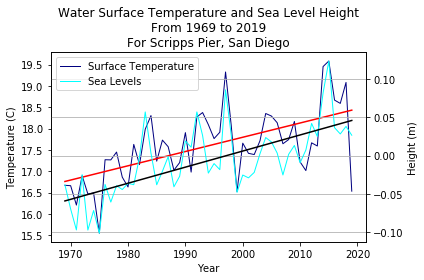

In [169]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (C)')
surf_temp, = ax1.plot(x_axis, surface_y, linewidth=1, color='Navy', 
                      label="Surface Temperature")

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Height (m)')
sea_height, = ax2.plot(x_axis, sealevel_y, linewidth=1, color='cyan', 
                       label="Sea Levels")

# adds a legend and sets location on upper righthand corner
plt.title(f"""Water Surface Temperature and Sea Level Height
From 1969 to 2019
For Scripps Pier, San Diego""")
plt.legend(loc = 'upper left')

fig.tight_layout()
plt.grid()

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='best')

# adding trendline 
z = np.polyfit(x_axis, surface_y, 1)
m = np.polyfit(x_axis, sealevel_y, 1)
p = np.poly1d(z)
q = np.poly1d(m)
ax1.plot(x_axis, p(x_axis), "r")
ax2.plot(x_axis, q(x_axis), "k")

# saves an image of the above chart to view in Class Data folder
plt.savefig("c:/Users/User/Desktop/Data_Viz_Repo/Climate-Project-Repo/temp_seal.png")
plt.show()

In [156]:
# T-test for water surface temperature and sea level height
stats.ttest_ind(surface_y, sealevel_y, equal_var=False)

Ttest_indResult(statistic=148.9277666990509, pvalue=3.3253990021798815e-68)

In [165]:
# Testing method for Two-Sample t-Test 

# Sample 1: Sea Level Height
observations = 51
mu = sea_1969['MSL'].mean()
sd = sea_1969['MSL'].std()
std_err = sea_1969['MSL'].sem()
print(mu, sd, std_err)

-0.006673648247177661 0.04593067636471657 0.006431581135944864


In [166]:
# Sample 2: Surface Temperature 
observations = 51
mu2 = temp_1969['Surface Temperature'].mean()
sd2 = temp_1969['Surface Temperature'].std()
std_err2 = temp_1969['Surface Temperature'].sem()
print(mu2, sd2, std_err2)

17.59583960835361 0.8428303495040212 0.11801985526248476


In [167]:
df = 49 # degrees of freedom 50 - 1
test_stat = (mu2 - mu) / (((sd2**2/observations) + (sd**2/observations))**(1/2))
test_stat

148.9277666990509

In [170]:
# measuring Pearson correlation coefficient 

values = pd.DataFrame({
    'Year': temp_1969['Year'],
    'Surface Temperature': temp_1969['Surface Temperature'],
    'Height(m)': sea_1969['MSL'],
})
values.head()

,Year,Surface Temperature,Height(m)
0,1969.0,16.669315,-0.038000
1,1970.0,16.660440,-0.069583
2,1971.0,16.205753,-0.096833
3,1972.0,16.893443,-0.024833
4,1973.0,16.466849,-0.097000


In [173]:
pearson_corr = values[['Surface Temperature', 'Height(m)']].corr(method="pearson")
pearson_corr

,Surface Temperature,Height(m)
Surface Temperature,1.000000,0.833969
Height(m),0.833969,1.000000


In [ ]:
# The correlation between surface temperature and sea level height indicate a strong
    # linear relationship.